In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# 1. Basic Operations

**Q1.** Write code to create a DataFrame from a dictionary containing student names and their scores in three subjects (Math, Science, English).<br/>
* Write a code to add a new column `Total Marks`, which calculates the total marks for each student.
* Print first five rows of the DataFrame and summary statistics using the `describe()` method.


```python
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}
```

In [10]:
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}

scores=pd.DataFrame(data)
totScore=scores.Math+scores.Science+scores.English
scores.eval('TotalScore = Math + Science + English',inplace=True)#df["total"]=df["sciece"]+....
print(scores.describe())

            Math    Science    English  TotalScore
count   5.000000   5.000000   5.000000    5.000000
mean   84.000000  86.000000  84.600000  254.600000
std     9.617692   6.670832   4.774935   14.240786
min    70.000000  75.000000  78.000000  235.000000
25%    80.000000  85.000000  82.000000  253.000000
50%    85.000000  88.000000  85.000000  253.000000
75%    90.000000  90.000000  88.000000  257.000000
max    95.000000  92.000000  90.000000  275.000000


**Q2.** Create a dummy CSV file named students.csv containing the following columns: Name, Age, Gender, and Marks (atleast 5 entries). Perform the following tasks:

- Load the file into a DataFrame using Pandas.
- Display the last 3 rows of the DataFrame.
- Print the total number of rows and columns in the DataFrame.

In [55]:
data={
    "Name":["Ishaan","Aarav","Jay","Aaryan","Anvit"],
    "Age":[18]*5,
    "Gender":["Male"]*5,
    "Marks":[100,90,40,80,98]
}
df=pd.DataFrame(data)
print(df.tail(3))
row,col=df.shape
print("Rows:",row,"\nColumns:",col)

     Name  Age Gender  Marks
2     Jay   18   Male     40
3  Aaryan   18   Male     80
4   Anvit   18   Male     98
Rows: 5 
Columns: 4


**Q3.** Create and populate a DataFrame with columns Employee_ID, Name, Department, and Salary. Now perform the following:

- Add a new column Bonus where each employee gets 10% of their Salary.
- Increase the Salary of all employees in the IT department by 20%.
- Drop the Department column from the DataFrame.


In [103]:
data={
    'Employee_ID': [101, 102, 103, 104, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Department': ['HR', 'IT', 'Engineering', 'Marketing', 'IT'],
    'Salary': [55000, 60000, 75000, 65000, 50000]
}

df=pd.DataFrame(data)
df.eval("Bonus=Salary*0.1",inplace=True)

# df['Salary'] = df['Salary'].where(df['Department'] != 'IT', df['Salary'] * 1.2)

# df.loc[df.Department=="IT", "Salary"] *=1.2 
df[df.Department=="IT"]["Salary"]*=1.2
print(df)

   Employee_ID     Name   Department  Salary   Bonus
0          101    Alice           HR   55000  5500.0
1          102      Bob           IT   60000  6000.0
2          103  Charlie  Engineering   75000  7500.0
3          104    David    Marketing   65000  6500.0
4          105      Eve           IT   50000  5000.0


# 2. Indexing and Slicing

**Q1.** You are given a data about employees' performance:

```python
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}
```
Using boolean indexing, select employees who meet all of the following conditions:

- Belong to either 'HR' or 'IT' departments.
- Have a performance rating greater than or equal to 8.0.
- Earn a salary less than 55,000 or have been with the company for at least 4 years.


In [ ]:
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}

df=pd.DataFrame(data)
mask=((df.Department=="HR") | (df.Department=="IT")) & (df.Performance_Rating>=8.0) & ((df.Salary<=55000) | (df.Years_at_Company))
print(df[mask])
df.query("Performance_Rating>=8 and (Salary<55000 or Years_at_Company >=4) and (Department=='HR' or Department=='IT' )") # Try This

  Employee Department  Salary  Performance_Rating  Years_at_Company
0       E1         HR   50000                 8.2                 5
4       E5         HR   52000                 8.0                 4


,Employee,Department,Salary,Performance_Rating,Years_at_Company
0,E1,HR,50000,8.2,5
4,E5,HR,52000,8.0,4


**Q2.** Slicing Rows and Columns

```
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
```

Use slicing to select the following:

- The last 3 rows of the DataFrame.
- All columns except 'Stock' and 'Rating' from the first 3 rows.

In [113]:
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
df=pd.DataFrame(data)
print(df.iloc[2:])

      Product  Price  Stock  Rating
2      Tablet    300     50     3.8
3     Monitor    150     10     4.8
4  Headphones     50    100     4.0


**Q3.** Label-based Indexing with `.loc[]` and `.iloc[]`

```
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}
```

Using .loc[] and .iloc[], perform the following tasks:

- Select the row corresponding to 'Tom' using label-based indexing.
- Select the first two rows and the 'Salary' and 'Department' columns using position-based indexing.

In [27]:
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}

df=pd.DataFrame(data)
df.index = df['Name']
df=df.drop(["Name"],axis=1)
# print(df)
print(df.loc["Tom",:],"\n\n")
print(df.iloc[:,[1,2]])


Age              40
Salary        75000
Department       IT
Name: Tom, dtype: object 


       Salary Department
Name                    
John    50000         HR
Sara    60000    Finance
Tom     75000         IT
Alex    45000         HR
Julia   52000         IT


# 3. GroupBy and Aggregations


**Q1.** You have a dataset of students' test scores. The dataset has the following columns:

* StudentID: Unique ID of the student.
* Subject: The subject of the test.
* Score: The score obtained (out of 100).
```
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})
```

* Write a function to calculate the average score for each student. Use this function to group the data by StudentID and find the average score.

In [8]:
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})
def avg(d):
    f=d.groupby("StudentID")["Score"]
    return f.mean()

df=pd.DataFrame(data)
print(avg(df))
#df.groups gives index
# df.get_group


StudentID
1    90.0
2    89.0
3    85.0
Name: Score, dtype: float64




**Q2.** Create  a dataset of retail sales with a hierarchical index consisting of `Region` and `StoreID`. The dataset contains the following columns:

* ProductCategory: The category of the product sold (e.g., Electronics, Clothing)

* Sales: The amount of sales made

Group the data by respective level indices  and calculate:

* Total sales in each region.
* Average sales in each store .


In [25]:
regions = ['North', 'South', 'East', 'West']
store_ids = [1, 2, 3, 4, 5]
product_categories = ['Electronics', 'Clothing', 'Groceries', 'Home Goods', 'Toys']
data = []
for region in regions:
    for store_id in store_ids:
        for product_category in product_categories:
            sales = np.random.randint(1000, 10000)  # Random sales between 1000 and 10000
            data.append([region, store_id, product_category, sales])


df=pd.DataFrame(data,columns=["Region","StoreID","ProductCategories","Sales"])
print((df.groupby("Region")["Sales"]).sum(),"\n\n")
print(df.groupby(["Region","StoreID"])["Sales"].mean())

Region
East     151043
North    134970
South    126271
West     139994
Name: Sales, dtype: int64 


Region  StoreID
East    1          6023.8
        2          4648.8
        3          8181.2
        4          3928.4
        5          7426.4
North   1          7373.4
        2          4613.0
        3          5507.8
        4          5028.6
        5          4471.2
South   1          6303.0
        2          6071.2
        3          3538.0
        4          4633.4
        5          4708.6
West    1          7580.0
        2          4459.0
        3          4343.8
        4          6350.6
        5          5265.4
Name: Sales, dtype: float64


**Q3.** You are given a DataFrame `df_orders` as follows:

```
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})
```
- Group the data by "`Category`" and compute:
  - Total revenue `(Price * Quantity)`.
  - Total discounts given` (Discount * Quantity)`.

- For each category find the followng:
  * The order with the highest revenue.
  * The average discount per order.




In [52]:
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
 })
# gb=df_orders.groupby("Category")
# totPrice=np.array(gb.apply(lambda x: (x['Price'] * x['Quantity']))).sum()
# totDiscount=np.array(gb.apply(lambda x: (x['Discount'] * x['Quantity']))).sum()

df_orders.eval("TotRev = (Price * Quantity)",inplace=True)
df_orders.eval("TotDisc = (Discount * Quantity)",inplace=True)
TotRevenue=df_orders.TotRev.sum()
TotDiscount=df_orders.TotDisc.sum()

gb=df_orders.groupby("Category")
print(gb["TotRev"].sum(),"\n\n")
print(gb["TotDisc"].sum(),"\n\n")
# print(np.argmax(df_orders.TotRev-df_orders.TotDisc).dtype)
print("Max Price Order ID :",df_orders.iloc[np.argmax(df_orders.TotRev-df_orders.TotDisc)]["Order_ID"],"\n\n")

print(df_orders)
print("Total Revenue :",TotRevenue)
print("Total Discount :",TotDiscount)
print("Average Discount",np.average(df_orders.TotDisc))


Category
Clothing        500
Electronics    2000
Groceries       500
Name: TotRev, dtype: int64 


Category
Clothing        50
Electronics    100
Groceries       50
Name: TotDisc, dtype: int64 


Max Price Order ID : O1 


      Category Order_ID  Price  Discount  Quantity  TotRev  TotDisc
0  Electronics       O1   1000        50         1    1000       50
1  Electronics       O2    500        25         2    1000       50
2     Clothing       O3    100        10         3     300       30
3     Clothing       O4    200        20         1     200       20
4    Groceries       O5     50         5         4     200       20
5    Groceries       O6     60         6         5     300       30
Total Revenue : 3000
Total Discount : 200
Average Discount 33.333333333333336


#4. Handling Missing Data

You are provided with a dataset, `numeric_df`, containing numeric features from the Titanic dataset. Your task is to explore and handle the missing data systematically.



**Q1.** **Load and Inspect the Data**
- Run the cell below to get the dataset `numeric_df`.
- Display the first 5 rows of the dataset.
- Create a **heatmap** to visualize where the missing values occur.
- Count the missing values in each column and report them (also, plot them).
- Drop the column with more than 60 percent `NaN` values. Why?




**Q2** **Handle Missing Values**
- For the `pclass` column, use **mode imputation** to fill the missing values.
- Explain why mode imputation is appropriate for this column.

- How would you impute the values for the column `age`. Why?



**Q3** **Analyze Results**
- Compare the dataset before and after imputation:
  - Count the missing values after imputation.
  - Calculate the **mean** of all numeric columns before and after imputation.

In [3]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Introducing missing values in the 'pclass' column
np.random.seed(42)
pclass_nan_indices = np.random.choice(numeric_df.index, size=int(0.05 * len(numeric_df)), replace=False)
numeric_df.loc[pclass_nan_indices, 'pclass'] = np.nan

# Introducing missing values in the 'parch' column
parch_nan_indices = np.random.choice(numeric_df.index, size=int(0.70 * len(numeric_df)), replace=False)
numeric_df.loc[parch_nan_indices, 'parch'] = np.nan

   survived  pclass   age  sibsp  parch     fare
0         0     3.0  22.0      1    0.0   7.2500
1         1     1.0  38.0      1    NaN  71.2833
2         1     3.0  26.0      0    NaN   7.9250
3         1     1.0  35.0      1    0.0  53.1000
4         0     3.0  35.0      0    0.0   8.0500


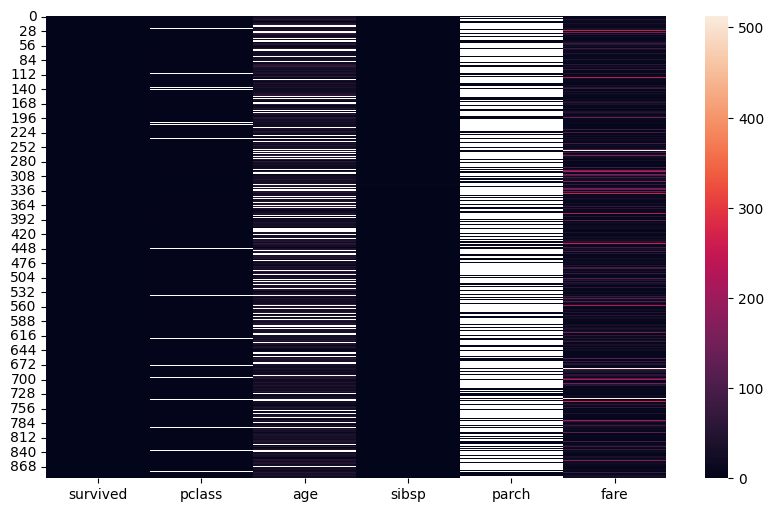

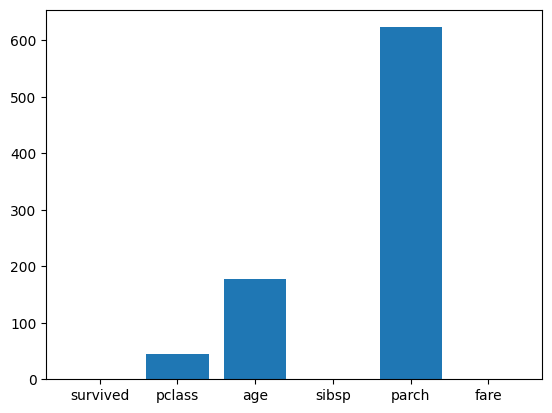

,survived,pclass,age,sibsp,fare
0,0,3.0,22.0,1,7.2500
1,1,1.0,38.0,1,71.2833
2,1,3.0,26.0,0,7.9250
3,1,1.0,35.0,1,53.1000
4,0,3.0,35.0,0,8.0500
...,...,...,...,...,...
886,0,NaN,27.0,0,13.0000
887,1,1.0,19.0,0,30.0000
888,0,3.0,NaN,1,23.4500
889,1,1.0,26.0,0,30.0000


In [43]:
#Question 1
print(numeric_df.head(5))
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df)
plt.show()
missing=numeric_df.isna().sum()
missing_percent=missing/(numeric_df.size//6)*100
plt.bar(missing.index,missing.values)
map=missing_percent>60
numeric_df.drop(columns=numeric_df.columns[map],inplace=True)
plt.show()
numeric_df

#5. Pandas: Merging Joining and Concatenation

**Q1.** You have two DataFrames `df1` and `df2` where `df1` has a column `student_id` and `df2` has a column `student_id` along with `grade`, how would you merge these DataFrames on `student_id` to keep only the rows present in both DataFrames? Show output of the merge.

```python
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
```


**Q2.** If you are provided with two DataFrames, employees and departments with `employee_id` as the index, how would you join them such that all rows from the employees DataFrame are kept, even if there is no matching department record? (you may assume employees have 2nd column as `employee_name` and departments have 2nd column as `department_name`, and randomly assign its data)

```python
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)
```



**Q3**. Given two DataFrames `df_a` and `df_b` with the same columns, how would you concatenate them vertically, resetting the index so it starts from zero in the combined DataFrame? (you may assume both dataframes have 2 columns each, and randomly assign its data)

```python
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)
```


In [42]:
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

mergeData=pd.merge(df1,df2, on="student_id")
print(mergeData)

   student_id     name grade
0           2      Bob     A
1           3  Charlie     B
2           4    David     C


In [58]:
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4],
    'department_name': ['A', 'B', 'C']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)
Merged=pd.merge(employees,departments, on="employee_id",how="outer")
Merged


,employee_id,employee_name,department_name
0,1,Alice,NaN
1,2,Bob,A
2,3,Charlie,B
3,4,David,C


In [70]:
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)

merged=pd.concat((df_a,df_b),axis=0,ignore_index=True)
merged

,student_id,name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
4,5,Anish
5,6,Divakar
6,7,Vaibhav
7,8,Tanvi



#6. Pandas: Advanced Operations (Evaluation and Query)




You are provided with the dataset, `iris`, which contains information about iris flower species and their physical measurements. Your task is to use :


**Q1** **Pandas advanced operations** such as evaluation (`eval`) and conditional querying (`query`) to analyze and extract insights from the dataset.



**Q2** **Load and Inspect the Data**
- Run `iris = sns.load_dataset('iris')` to load the dataset.
- Display the first 5 rows of the dataset.
- Print the summary statistics of the dataset.


**Q3** **Filter the Data Using `query`**
- Use the `query` method to:
  1. Find all flowers with a `sepal_length`> 6.5 and a `petal_length` > 5.
  2. Find all `virginica` flowers with a `petal_width` less than 2.



**Q4** **Use `eval` for Calculations**
- Create a new column `petal_area` using the formula:  
  `petal_area = petal_length * petal_width`
- Display the top 5 flowers with the largest `petal_area`.
- Use `query` to filter flowers that meet the following conditions:
  - `petal_area` > 10
  - `sepal_length` is in the range 5 to 7.



**Q5** **Analyze and Visualize**
- Perform a group-wise analysis:
  1. Calculate the **average petal length** for each species.
  2. Find the **count of flowers** for each species.
  3. Create a scatter plot of `sepal_length` vs. `petal_length`, colored by species.


In [47]:
iris = sns.load_dataset('iris')
print(iris.head(5))
iris.describe()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
# Use the `query` method to:
#   1. Find all flowers with a `sepal_length`> 6.5 and a `petal_length` > 5.
#   2. Find all `virginica` flowers with a `petal_width` less than 2.

iris = sns.load_dataset('iris')

df1=iris.query("sepal_length >6.5 and petal_length >5 ")
print(df1)
df2=iris.query(" species== 'virginica' and petal_width <2 ")
print(df2)


     sepal_length  sepal_width  petal_length  petal_width    species
102           7.1          3.0           5.9          2.1  virginica
105           7.6          3.0           6.6          2.1  virginica
107           7.3          2.9           6.3          1.8  virginica
108           6.7          2.5           5.8          1.8  virginica
109           7.2          3.6           6.1          2.5  virginica
112           6.8          3.0           5.5          2.1  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica
120           6.9          3.2           5.7          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica
124           6.7          3.3           5.7          2.1  virginica
125           7.2          3.2           6.0          1.8  virginica
129           7.2          3.0           5.8          1.6  virginica
130           7.4          2.8    

In [72]:
#  Create a new column `petal_area` using the formula:  
#   `petal_area = petal_length * petal_width`
# - Display the top 5 flowers with the largest `petal_area`.
# - Use `query` to filter flowers that meet the following conditions:
#   - `petal_area` > 10
#   - `sepal_length` is in the range 5 to 7.

iris = sns.load_dataset('iris')
iris.eval(" petal_area= petal_length * petal_width",inplace=True)
print(iris.head(5))
print(iris.query("petal_area>10 and sepal_length>5 and sepal_length<7"))

   sepal_length  sepal_width  petal_length  petal_width species  petal_area
0           5.1          3.5           1.4          0.2  setosa        0.28
1           4.9          3.0           1.4          0.2  setosa        0.28
2           4.7          3.2           1.3          0.2  setosa        0.26
3           4.6          3.1           1.5          0.2  setosa        0.30
4           5.0          3.6           1.4          0.2  setosa        0.28
     sepal_length  sepal_width  petal_length  petal_width    species  \
100           6.3          3.3           6.0          2.5  virginica   
103           6.3          2.9           5.6          1.8  virginica   
104           6.5          3.0           5.8          2.2  virginica   
108           6.7          2.5           5.8          1.8  virginica   
110           6.5          3.2           5.1          2.0  virginica   
111           6.4          2.7           5.3          1.9  virginica   
112           6.8          3.0          

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64 


species
setosa        50
versicolor    50
virginica     50
Name: sepal_length, dtype: int64 




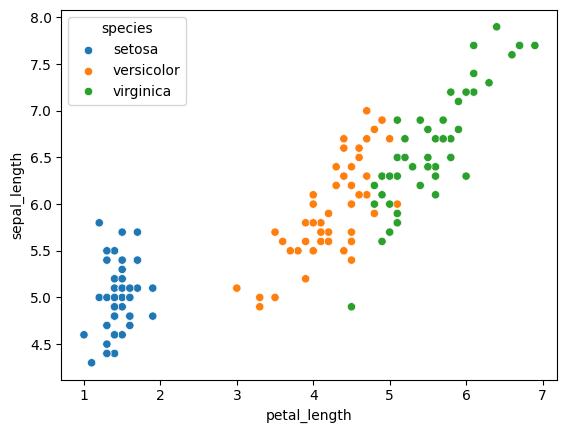

In [99]:
# Perform a group-wise analysis:
#   1. Calculate the **average petal length** for each species.
#   2. Find the **count of flowers** for each species.
#   3. Create a scatter plot of `sepal_length` vs. `petal_length`, colored by species.


iris = sns.load_dataset('iris')
# np.average(
averages=iris.groupby("species").petal_length.mean()
counts=iris.groupby("species").sepal_length.count()

print(averages,"\n\n")
print(counts,"\n\n")
sns.scatterplot(iris,x="petal_length",y="sepal_length",hue="species")

plt.show()

#7. Matplotlib: Basic Plotting Questions

**Q1. Line Plot**

Plot a sine wave (\(y = sin(x)\)) for \(x in [0, 2π]\). Customize the plot by:
1. Adding a title to the graph.
2. Adding labels for the x-axis and y-axis.
3. Displaying a grid.


**Q2. Multiple Line Plots**

Plot the following functions on the same graph for \(x \in [0, 2π]\):
1. \(y_1 = sin(x)\)
2. \(y_2 = cos(x)\)
Customize the graph by:
- Using different colors and line styles for each function.
- Adding a legend to identify the curves.



**Q3. Plot Customization**

Plot the function \(y = x^2\) for \(x \in [-10, 10]\). Customize the plot by:
1. Adding a title and axis labels.
2. Changing the line style, color, and thickness.
3. Adjusting the axis limits to make the graph more visually appealing.


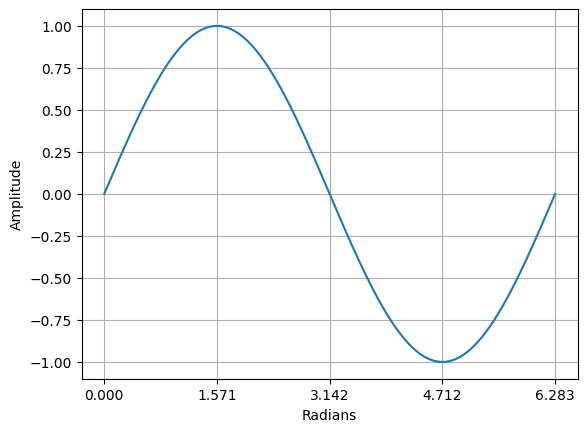

In [11]:
x=np.linspace(0,2*np.pi,500)
xTicks=np.linspace(0,2*np.pi,5)
y=np.sin(x)
plt.plot(x,y)
plt.grid()
plt.xlabel("Radians")
plt.ylabel("Amplitude")
plt.xticks(xTicks)
plt.show()

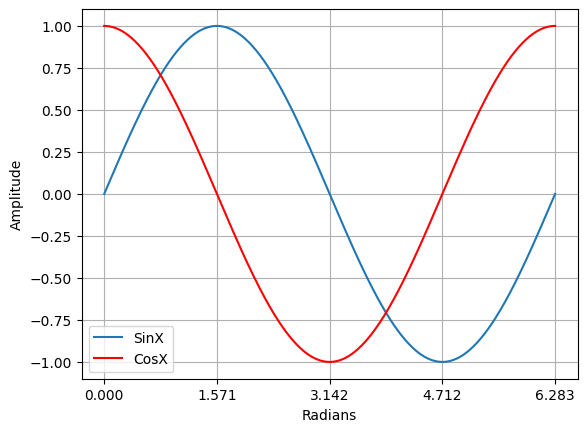

In [100]:
x=np.linspace(0,2*np.pi,500)
xTicks=np.linspace(0,2*np.pi,5)
sinx=np.sin(x)
cosx=np.cos(x)
plt.plot(x,sinx,label="SinX")
plt.plot(x,cosx,color="r",label="CosX")
plt.legend()
plt.grid()
plt.xlabel("Radians")
plt.ylabel("Amplitude")
plt.xticks(xTicks)
plt.show()

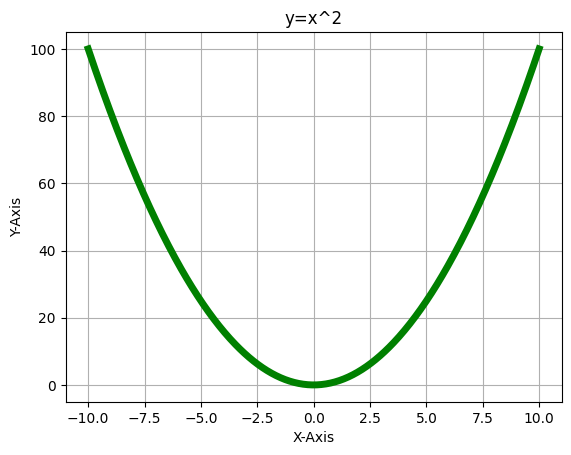

In [105]:
# Q3. Plot Customization**

# Plot the function \(y = x^2\) for \(x \in [-10, 10]\). Customize the plot by:
# 1. Adding a title and axis labels.
# 2. Changing the line style, color, and thickness.
# 3. Adjusting the axis limits to make the graph more visually appealing.

x=np.linspace(-10,10,500)
y=np.square(x)
plt.plot(x,y,color="green",linestyle="-",linewidth=5)
plt.title("y=x^2")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.grid()
plt.show()


#8a. Bar Plot

**Q1** You are provided with the `tips` dataset. Your task is to create a **bar plot** using Matplotlib.

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
```
- Create a bar plot showing the average tip for each day of the week.
Label the x-axis as Day, the y-axis as Average Tip, and add a title: "Average Tip by Day".

- Based on the bar plot, which day has the highest average tip?


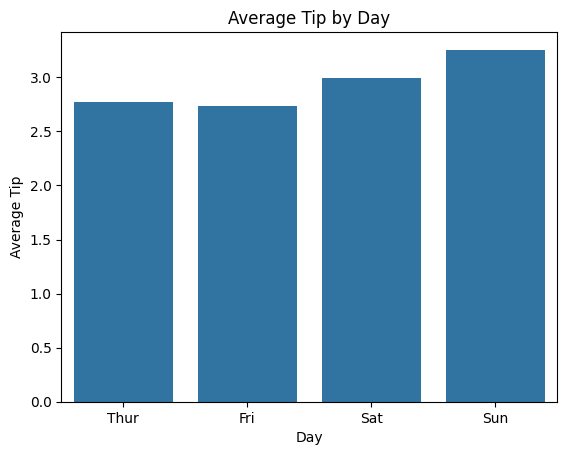

In [115]:
import seaborn as sns
tips=sns.load_dataset("tips")
avgTips=tips.groupby("day").tip.mean()
sns.barplot(avgTips)
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.title("Average Tip by Day")
plt.show()


Based on the bar-plot above the **Sunday** has the highest average tip

#8b. Scatter Plot

**Q1.** You are provided with the `tips` dataset. Your task is to create a **scatter plot** using Matplotlib.

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
  ```

- Create a scatter plot with total_bill on the x-axis and tip on the y-axis.
- Label the x-axis as Total Bill, the y-axis as Tip, and add a title: "Relationship between Total Bill and Tip".

- Based on the scatter plot, do you observe any relationship between total_bill and tip?


There appears to be a positive relationship between `total_bill` and `tip`. As the total bill increases, the tip generally tends to increase as well. However, the relationship **does not appear to be perfectly linear**, and there is some **variability** in the amount of tip given for a given total bill

#9. Matplotlib: Subplots and Layouts

**Q1.** Create a 2x2 grid of subplots with:
- Subplot (1,1): Plot y = sin(x).
- Subplot (1,2): Plot y = cos(x) .
- Subplot (2,1): Plot y = e<sup>−x</sup>
- Subplot (2,2): Plot y=ln(x) for x∈[0.1,2].

Customize background colors, add unique x and y labels, and set titles.

**Q2.** Create a subplot within another subplot:
- Main subplot: Display a scatter plot of 100 random points with x and y values between 0 and 1.
- Inset subplot: Display a histogram of the x-values from the scatter plot.

**Q3.** Create a Layout with One Large and Two Smaller Subplots

- Design a large subplot occupying the top two-thirds of the figure and plot \( y = sin(x) \) and \( y = cos(x) \) on the same graph.  

- Create two smaller subplots in the bottom row:  
   - On the left, plot y =x<sup>2</sup>.  
   - On the right, plot y = e<sup>x</sup>.  

Ensure each subplot has appropriate titles, axis labels, and legends where necessary. Use a clean layout that avoids overlapping elements.




#10. Matplotlib: Advanced Customization

**Q1. Customizing Axes and Ticks**

Create a line plot for y = x^2 in the range -10 to 10.
Customize the axes and ticks:
1. Set x-axis range to -10 to 10.
2. Set y-axis range to 0 to 100.
3. Use custom tick marks at intervals of 2 for x-axis and 10 for y-axis.
4. Rotate x-axis tick labels by 45 degrees.

**Q2. Multiple Subplots with Shared Legend and Grid Customization**

Create a figure with four subplots (2x2 grid) showing different trigonometric functions:
1. Top-left: y = sin(x)
2. Top-right: y = cos(x)
3. Bottom-left: y = tan(x) (restrict x to avoid undefined regions).
4. Bottom-right: y = sin^2(x) + cos^2(x) (should always equal 1).

**Q3. Subplots and Shared Axes**

Create two subplots side-by-side:
1. Bar chart for sales (random data) from January to June.
2. Line chart for cumulative sales.
Share the y-axis and add titles, a common x-axis label, and a grid for the second plot.

**Q4. Adding Annotations**

Create a scatter plot of 10 random points:
1. Annotate the point with the max y-coordinate with a red star and text label.
2. Customize marker size and color for all points.

**Q5. Creating a Custom Colormap**

Generate a heatmap for a 5x5 matrix of random numbers between 0 and 1:
1. Use a custom colormap (blue to red).
2. Add a color bar and display exact cell values rounded to 2 decimals.


**Q6. Customization of 3D Plot**

Using Matplotlib’s mpl_toolkits.mplot3d, create a 3D surface plot for the function:
z = sin(sqrt(x^2 + y^2))

Requirements:
1. Generate x and y values in the range -5 to 5 using a meshgrid.
2. Use a custom colormap that highlights peaks and valleys (e.g., `coolwarm`).
3. Add a color bar with a label "Amplitude".
4. Add labels for all three axes and a title.
5. Rotate the 3D plot to a custom viewing angle using ax.view_init.